In [171]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data_loc = '../Cleaned_Market_data_anton/'

In [230]:
df = pd.read_csv(data_loc+'df_bricks.csv', index_col=0, decimal=',')
df.head()

,brick_nr,brick,life_expectancy (yrs),patients,population,patients_per_1000,longterm_disease_anddel,Andel med blodprop i hjertet,svaert_overvaegt Andel,uddannelse_lang antal,uddannelse_lang (value_per_1000),fravær,who_minimums_fysisk_aktivitet Andel
0,101,Bornholm,77.190500,2248.978472,33046,68.055997,0.406500,0.0205,0.175500,6035.258672,182.632048,6.286500,0.302000
1,102,Amager,79.967667,6136.772115,154254,39.783553,0.326667,0.0090,0.130333,64810.874712,420.156850,5.747333,0.243333
2,103,Nørrebro/City,79.283000,3019.148357,88293,34.194651,0.305000,0.0075,0.107500,44280.909321,501.522310,5.499500,0.221500
3,104,Vesterbro/Christianshavn,80.050000,3387.602593,103052,32.872750,0.307500,0.0080,0.100000,49553.419564,480.858397,5.580000,0.225000
4,105,Frederiksberg,79.645500,3574.931136,105260,33.962865,0.306000,0.0080,0.104000,52262.047446,496.504346,5.537500,0.223000


In [245]:
dd = df.drop(columns=['brick_nr', 'brick']).corr()

In [240]:
nodes = df.drop(columns=['brick_nr', 'brick']).corr().columns
len(nodes)

11

In [277]:
from igraph import *

In [278]:
dd.values.flatten()

array([ 1.        ,  0.05225153,  0.13861869, -0.32028152, -0.30427066,
       -0.35198384, -0.23601449,  0.09162837,  0.14771555, -0.28277954,
       -0.126397  ,  0.05225153,  1.        ,  0.81722208,  0.05099497,
       -0.04387904, -0.09400925, -0.0296241 ,  0.48322987,  0.08303918,
        0.09171698,  0.02063509,  0.13861869,  0.81722208,  1.        ,
       -0.49552655, -0.498055  , -0.5325359 , -0.51921931,  0.88457845,
        0.58656885, -0.21910804, -0.48223279, -0.32028152,  0.05099497,
       -0.49552655,  1.        ,  0.79451537,  0.82875344,  0.86490082,
       -0.74345294, -0.89430947,  0.51193689,  0.87254093, -0.30427066,
       -0.04387904, -0.498055  ,  0.79451537,  1.        ,  0.80227398,
        0.76717195, -0.72002475, -0.80214751,  0.52012075,  0.69873357,
       -0.35198384, -0.09400925, -0.5325359 ,  0.82875344,  0.80227398,
        1.        ,  0.79997344, -0.73853752, -0.84340937,  0.47111307,
        0.78456198, -0.23601449, -0.0296241 , -0.51921931,  0.86

In [272]:
g = Graph.Full(11)
g.vs["name"] = nodes
g.es["corr"] = dd.values.flatten()

In [280]:
col = cm.get_cmap('RdBu', size)

NameError: name 'cm' is not defined

In [279]:
visual_style = {
        # For list of attributes see: https://igraph.org/python/doc/tutorial/tutorial.html#vertex-attributes-controlling-graph-plots
        "vertex_size" : 40,
        "vertex_color" : 'gold',
        "edge_width" : g.es["corr"],
        "edge_color" : dd.values.flatten(),
        "layout" : g.layout("kamada_kawai"),
        "bbox" : (600, 400),
        "margin" : 20,
        "edge_curved" : 0.8,
        "vertex_label" : g.vs["name"],
    }

plot(g, "diabetes_network.png", **visual_style)  # To save

ValueError: palette index used when no palette was given

In [95]:
# Lets pull out the numerical columns and call them X
X = df.values[:,2:]
y = df['brick_nr'].values


In [96]:
# Lets apply a standard scalar
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)


In [97]:
# lets look for linear dependencies

from sklearn.decomposition import PCA 
pca = PCA(n_components=3).fit(X_scaled)
PCs = pca.transform(X_scaled)
sum(pca.explained_variance_ratio_), 'good enough'

(0.8677223586215445, 'good enough')

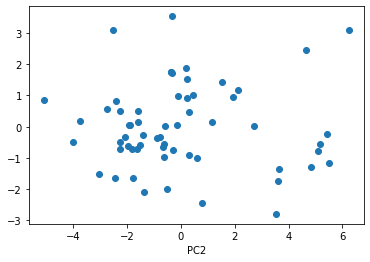

In [98]:
plt.scatter(PCs[:,0],PCs[:,1])
plt.xlabel('PC1')
plt.xlabel('PC2')
plt.show()

In [99]:
# lets do a train test split so that we dont overfit

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(PCs, y, test_size=0.33, random_state=42)


In [100]:
# lets start with clustering
from sklearn.cluster import KMeans

cluster = KMeans(n_clusters=3)
cluster.fit(X_train)

pred_labels = cluster.predict(X_test)



len(cluster.labels_), len(X_train), len(pred_labels), len(X_test)

(40, 40, 20, 20)

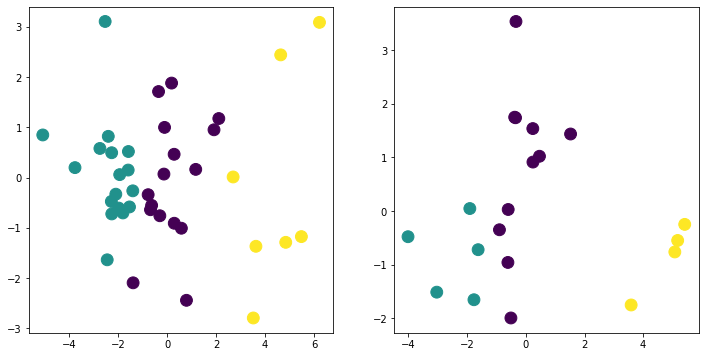

In [101]:
fig, ax = plt.subplots(1,2, figsize=(12,6))
ax[0].scatter(X_train[:,0],X_train[:,1], c=cluster.labels_, s=140)

ax[1].scatter(X_test[:,0],X_test[:,1], c=pred_labels, s=140)


plt.show()

In [102]:
### sales

In [166]:
filename = 'df_volume.csv'
df = pd.read_csv(data_loc+filename, index_col=[0]).T.drop(index=['Unnamed: 1'],)
df['A10BD20'].values.flatten()

array([3.0, 3.0, 4.0, ..., 7.0, nan, 1.0], dtype=object)

In [167]:
df = df.T.dropna().reset_index()

In [168]:
df

,index,202004,202005,202006,202007,202008,202009,202010,202011,202012,202101,202102,202103
0,A10BD20,3.0,-1.0,2.0,3.0,2.0,2.0,2.0,1.0,1.0,5.0,1.0,1.0
1,A10BD20,3.0,-1.0,-2.0,1.0,2.0,-2.0,-1.0,-1.0,5.0,-1.0,3.0,5.0
2,A10BD20,4.0,2.0,1.0,1.0,1.0,5.0,5.0,-1.0,-1.0,4.0,0.0,5.0
3,A10BD20,13.0,5.0,-2.0,18.0,1.0,9.0,-1.0,13.0,27.0,-2.0,2.0,15.0
4,A10BD20,9.0,1.0,1.0,10.0,2.0,7.0,0.0,1.0,2.0,-1.0,4.0,-3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2309,A10BD16,2.0,2.0,2.0,1.0,2.0,4.0,2.0,1.0,5.0,3.0,1.0,1.0
2310,A10BD16,3.0,1.0,-4.0,5.0,2.0,2.0,4.0,1.0,3.0,2.0,2.0,3.0
2311,A10BD16,1.0,1.0,1.0,3.0,1.0,3.0,2.0,2.0,1.0,3.0,1.0,3.0
2312,A10BD16,1.0,1.0,2.0,4.0,6.0,5.0,6.0,2.0,8.0,2.0,4.0,1.0


In [172]:
X = df.values[:,1:]
y = df.values[:,0]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
for i in [X_train, X_test, y_train, y_test]:
    print(np.shape(i))

(1550, 12)
(764, 12)
(1550,)
(764,)


In [173]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

y_pred = neigh.predict(X_test)

In [176]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test, y_pred)

array([[ 5,  4,  0, ...,  0,  0,  0],
       [ 4,  6,  1, ...,  0,  0,  0],
       [ 4,  0, 10, ...,  0,  0,  0],
       ...,
       [ 4,  2,  1, ...,  0,  0,  0],
       [ 3,  0,  4, ...,  1,  4,  0],
       [ 0,  0,  0, ...,  0,  0,  1]])

In [178]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     A10AB01       0.07      0.21      0.10        24
     A10AB04       0.13      0.40      0.19        15
     A10AB05       0.14      0.29      0.19        35
     A10AB06       0.10      0.27      0.14        11
     A10AC01       0.05      0.06      0.05        36
     A10AD01       0.00      0.00      0.00         4
     A10AD05       0.08      0.11      0.09        38
     A10AE04       0.08      0.14      0.11        28
     A10AE05       0.30      0.46      0.36        28
     A10AE06       0.21      0.12      0.16        32
     A10AE56       0.17      0.27      0.21        30
     A10BA02       0.75      0.58      0.65        31
     A10BB01       0.00      0.00      0.00         1
     A10BB07       0.00      0.00      0.00         3
     A10BB09       0.11      0.20      0.14        20
     A10BB12       0.06      0.05      0.05        22
     A10BD07       0.08      0.05      0.06        42
     A10BD08       0.21    

/Users/antongolles/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/antongolles/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/antongolles/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [186]:
X

array([[3.0, -1.0, 2.0, ..., 5.0, 1.0, 1.0],
       [3.0, -1.0, -2.0, ..., -1.0, 3.0, 5.0],
       [4.0, 2.0, 1.0, ..., 4.0, 0.0, 5.0],
       ...,
       [1.0, 1.0, 1.0, ..., 3.0, 1.0, 3.0],
       [1.0, 1.0, 2.0, ..., 2.0, 4.0, 1.0],
       [4.0, 1.0, 1.0, ..., -1.0, 4.0, 0.0]], dtype=object)

In [193]:
X_scaled = StandardScaler().fit_transform(X)
pca = PCA(n_components=2).fit(X_scaled)
PCs = pca.transform(X_scaled)

cluster = KMeans(n_clusters=3)
cluster.fit(X)

pred_labels = cluster.predict(X)


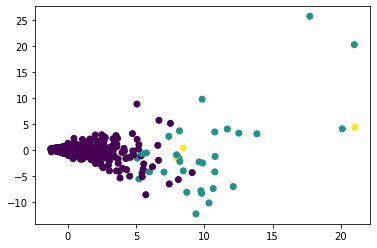

In [194]:
plt.scatter(PCs[:,0],PCs[:,1], c=pred_labels)

In [214]:
codes = df['index'].unique()

In [218]:
df['atc_letters'] = df['index'].apply(lambda x: x.split('A10')[1][:2])
df['atc_numbers'] = df['index'].apply(lambda x: x.split('A10')[1][2:])

In [219]:
df

,index,202004,202005,202006,202007,202008,202009,202010,202011,202012,202101,202102,202103,atc_letters,atc_numbers
0,A10BD20,3.0,-1.0,2.0,3.0,2.0,2.0,2.0,1.0,1.0,5.0,1.0,1.0,BD,20
1,A10BD20,3.0,-1.0,-2.0,1.0,2.0,-2.0,-1.0,-1.0,5.0,-1.0,3.0,5.0,BD,20
2,A10BD20,4.0,2.0,1.0,1.0,1.0,5.0,5.0,-1.0,-1.0,4.0,0.0,5.0,BD,20
3,A10BD20,13.0,5.0,-2.0,18.0,1.0,9.0,-1.0,13.0,27.0,-2.0,2.0,15.0,BD,20
4,A10BD20,9.0,1.0,1.0,10.0,2.0,7.0,0.0,1.0,2.0,-1.0,4.0,-3.0,BD,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2309,A10BD16,2.0,2.0,2.0,1.0,2.0,4.0,2.0,1.0,5.0,3.0,1.0,1.0,BD,16
2310,A10BD16,3.0,1.0,-4.0,5.0,2.0,2.0,4.0,1.0,3.0,2.0,2.0,3.0,BD,16
2311,A10BD16,1.0,1.0,1.0,3.0,1.0,3.0,2.0,2.0,1.0,3.0,1.0,3.0,BD,16
2312,A10BD16,1.0,1.0,2.0,4.0,6.0,5.0,6.0,2.0,8.0,2.0,4.0,1.0,BD,16


In [225]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df['atc_letters'])

df['atc_letters']  = le.transform(df['atc_letters'])

In [227]:
df

,index,202004,202005,202006,202007,202008,202009,202010,202011,202012,202101,202102,202103,atc_letters,atc_numbers,atc_letters_le
0,A10BD20,3.0,-1.0,2.0,3.0,2.0,2.0,2.0,1.0,1.0,5.0,1.0,1.0,6,20,6
1,A10BD20,3.0,-1.0,-2.0,1.0,2.0,-2.0,-1.0,-1.0,5.0,-1.0,3.0,5.0,6,20,6
2,A10BD20,4.0,2.0,1.0,1.0,1.0,5.0,5.0,-1.0,-1.0,4.0,0.0,5.0,6,20,6
3,A10BD20,13.0,5.0,-2.0,18.0,1.0,9.0,-1.0,13.0,27.0,-2.0,2.0,15.0,6,20,6
4,A10BD20,9.0,1.0,1.0,10.0,2.0,7.0,0.0,1.0,2.0,-1.0,4.0,-3.0,6,20,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2309,A10BD16,2.0,2.0,2.0,1.0,2.0,4.0,2.0,1.0,5.0,3.0,1.0,1.0,6,16,6
2310,A10BD16,3.0,1.0,-4.0,5.0,2.0,2.0,4.0,1.0,3.0,2.0,2.0,3.0,6,16,6
2311,A10BD16,1.0,1.0,1.0,3.0,1.0,3.0,2.0,2.0,1.0,3.0,1.0,3.0,6,16,6
2312,A10BD16,1.0,1.0,2.0,4.0,6.0,5.0,6.0,2.0,8.0,2.0,4.0,1.0,6,16,6
